In [3]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

# 7번

In [62]:
player_A = [7/10 , 999999/1000000 , (7+999999)/(10+ 1000000)]
player_B = [8/10, 4/4 , 12/14]

In [63]:
df1_ = np.concatenate([player_A, player_B], axis = 0)

In [64]:
x= ['season1','season2', 'total']
season = 2*x

In [65]:
df2 = pd.DataFrame({'prop':df1_ , 'season':season, 'player':3*['A'] + 3*['B'] })
df2

,prop,season,player
0,0.700000,season1,A
1,0.999999,season2,A
2,0.999996,total,A
3,0.800000,season1,B
4,1.000000,season2,B
5,0.857143,total,B


<AxesSubplot:xlabel='player', ylabel='prop'>

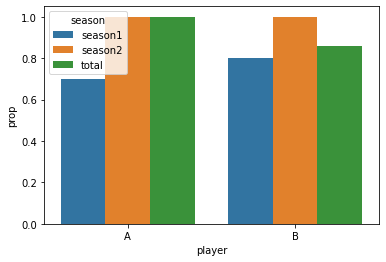

In [66]:
sns.barplot(df2, x= 'player', y= 'prop', hue= 'season')

#### 교훈 : 롱 데이터프레임을 잘 쓰자..

# 6번

In [24]:
A= np.array([0,1,4,5,5,4.1,1,0])
B= np.array([0,2,3,5,5,3,0.5,0])

In [55]:
coord = pd.DataFrame({'x':A , 'y':B, 'course':['A']*4+['B']*4})
coord

,x,y,course
0,0.0,0.0,A
1,1.0,2.0,A
2,4.0,3.0,A
3,5.0,5.0,A
4,5.0,5.0,B
5,4.1,3.0,B
6,1.0,0.5,B
7,0.0,0.0,B


In [62]:
park_stamina

array([100.        ,  97.76393202,  92.76393202,  85.69286421,
        18.6217964 ,  13.54144208,  12.42340809,  12.42340809])

In [65]:
coord.assign(stamina = park_stamina)

,x,y,course,stamina
0,0.0,0.0,A,100.000000
1,1.0,2.0,A,97.763932
2,4.0,3.0,A,92.763932
3,5.0,5.0,A,85.692864
4,5.0,5.0,B,18.621796
5,4.1,3.0,B,13.541442
6,1.0,0.5,B,12.423408
7,0.0,0.0,B,12.423408


<AxesSubplot:xlabel='x', ylabel='y'>

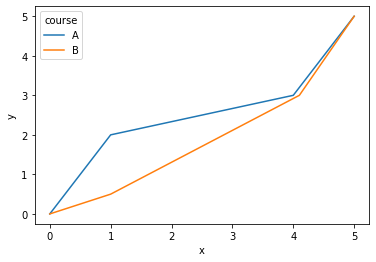

In [29]:
sns.lineplot(data = coord , x= 'x', y='y', hue = 'course')

In [30]:
dist_ = lambda x,y : np.sqrt((x**2 + y**2))

In [35]:
100 - np.cumsum(list(map(dist_, coord.x,coord.y)))

array([100.        ,  97.76393202,  92.76393202,  85.69286421,
        78.6217964 ,  73.54144208,  72.42340809,  72.42340809])

In [40]:
stamina= 100 - np.cumsum(list(map(dist_, coord.x, coord.y)))

In [44]:
park_stamina= stamina - ([0]*4 + [60]*4)

In [47]:
coord['stamina'] = park_stamina

In [48]:
coord

,x,y,course,stamina
0,0.0,0.0,A,100.000000
1,1.0,2.0,A,97.763932
2,4.0,3.0,A,92.763932
3,5.0,5.0,A,85.692864
4,5.0,5.0,B,18.621796
5,4.1,3.0,B,13.541442
6,1.0,0.5,B,12.423408
7,0.0,0.0,B,12.423408


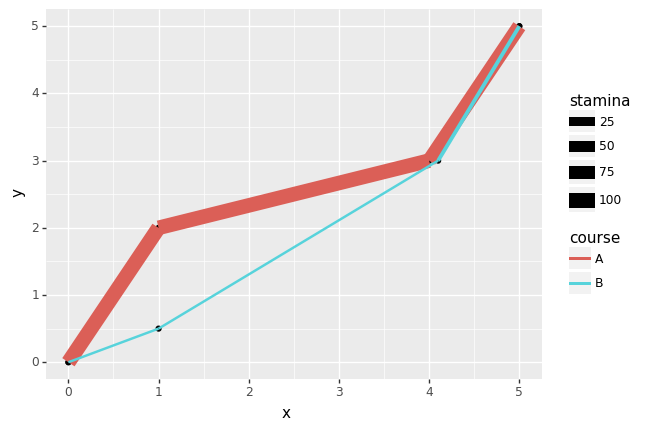

<ggplot: (118257082603)>

In [54]:
ggplot(data=  coord) +\
geom_point(aes(x='x',y='y')) +\
geom_line(aes(x='x',y='y',size= 'stamina', color = 'course'))

# 5번

In [67]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

In [69]:
df.loc[:,['Loaned From','Marking']]

,Loaned From,Marking
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
16705,NaN,5.0
16706,NaN,NaN
16707,NaN,NaN
16708,NaN,NaN


In [127]:
df.drop(['Loaned From','Marking'],axis=1)
df.loc[:,map(lambda x: 'Loaned From' != x and 'Marking' != x , df.keys())]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


In [1]:
1+1

2

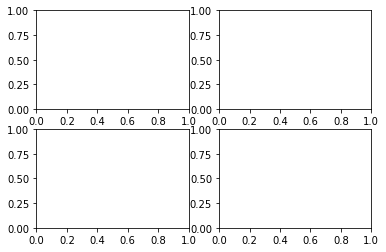

In [5]:
fig, axs = plt.subplots(2,2)

In [12]:
axs[0,0].plot([1,2,3,4])

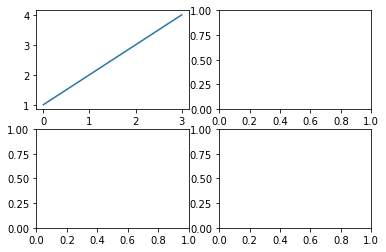

In [13]:
fig

In [14]:
axs[0,0].set_xlim(-2,5)

(-2.0, 5.0)

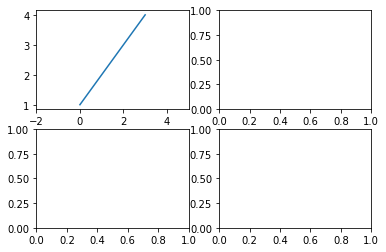

In [15]:
fig

# ggplot 복습

In [17]:
df1=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/male1.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/male2.csv')  
df3=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/female.csv') 
df4=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/foreign.csv')

In [18]:
_df = pd.concat([pd.concat([df1,df2],axis=1).assign(g='m'),df3.assign(g='f')])
df = pd.concat([_df.assign(g2='korea'),df4.assign(g2='foreign')]).reset_index(drop=True)
df

,w,h,g,g2
0,72.788217,183.486773,m,korea
1,66.606430,173.599877,m,korea
2,69.806324,173.237903,m,korea
3,67.449439,173.223805,m,korea
4,70.463183,174.931946,m,korea
...,...,...,...,...
1525,78.154632,188.324350,m,foreign
1526,74.754308,183.017979,f,foreign
1527,91.196208,190.100456,m,foreign
1528,87.770394,187.987255,m,foreign


In [19]:
df1

,w
0,72.788217
1,66.606430
2,69.806324
3,67.449439
4,70.463183
...,...
995,72.850877
996,59.093632
997,67.027289
998,62.946371


In [20]:
df2

,h
0,183.486773
1,173.599877
2,173.237903
3,173.223805
4,174.931946
...,...
995,177.201090
996,174.697872
997,176.084689
998,171.307062


In [21]:
df3

,w,h
0,50.832743,157.144482
1,49.767618,160.784478
2,47.930381,159.044675
3,49.200626,157.992591
4,51.045006,163.078925
...,...,...
495,50.287127,162.598885
496,50.463208,159.185937
497,53.313993,165.979300
498,49.372940,157.569320


In [22]:
df4

,w,h,g
0,94.033546,195.297789,m
1,84.139393,189.289647,m
2,75.860293,185.265391,f
3,87.412981,189.631678,m
4,84.935675,187.196177,m
5,79.383565,195.972143,m
6,83.870445,186.682876,m
7,94.606364,202.132426,m
8,83.576451,198.008932,m
9,85.888925,188.213601,m


In [24]:
_df

,w,h,g
0,72.788217,183.486773,m
1,66.606430,173.599877,m
2,69.806324,173.237903,m
3,67.449439,173.223805,m
4,70.463183,174.931946,m
...,...,...,...
495,50.287127,162.598885,f
496,50.463208,159.185937,f
497,53.313993,165.979300,f
498,49.372940,157.569320,f


In [23]:
df

,w,h,g,g2
0,72.788217,183.486773,m,korea
1,66.606430,173.599877,m,korea
2,69.806324,173.237903,m,korea
3,67.449439,173.223805,m,korea
4,70.463183,174.931946,m,korea
...,...,...,...,...
1525,78.154632,188.324350,m,foreign
1526,74.754308,183.017979,f,foreign
1527,91.196208,190.100456,m,foreign
1528,87.770394,187.987255,m,foreign


<AxesSubplot:xlabel='w', ylabel='h'>

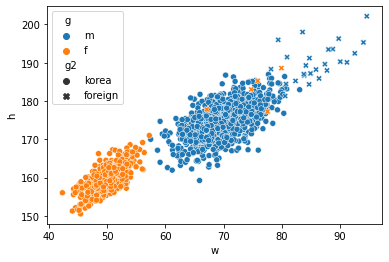

In [26]:
sns.scatterplot(data= df, x='w', y= 'h' , hue='g', style='g2')

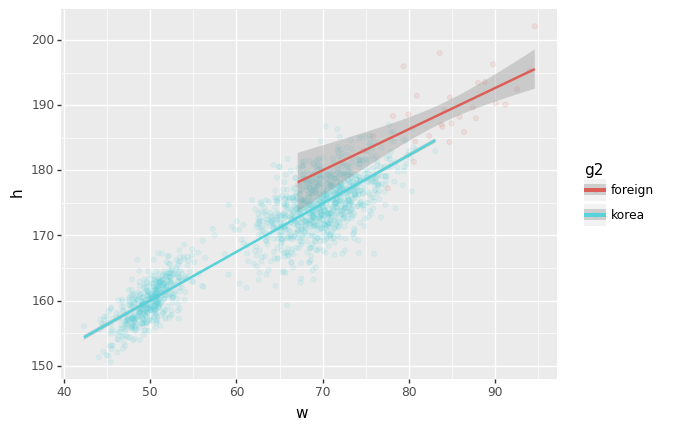

<ggplot: (89196730278)>

In [36]:
ggplot(data = df) +\
    geom_point(aes(x='w',  y= 'h' , color= 'g2'),alpha= 0.1) +\
    geom_smooth(aes(x='w',y='h', color='g2'))